In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
poverty = pd.read_csv('./MPI_national.csv', sep=',')
df = pd.DataFrame(poverty)
# df.head()
# df.describe()
# df.plot()
# df.hist( figsize = (10,10))
# df.boxplot(column = 'MPI Rural', figsize = (10,10))
# df.boxplot( figsize = (10,10))
df['total_MPI'] = df['MPI Urban'] + df['MPI Rural']
is_poor = df['total_MPI'] >= 0.20
df[is_poor]
# df[is_poor].describe()
# df[is_poor].count()





,ISO,Country,MPI Urban,Headcount Ratio Urban,Intensity of Deprivation Urban,MPI Rural,Headcount Ratio Rural,Intensity of Deprivation Rural,total_MPI
41,BOL,"Bolivia, Plurinational State of",0.019,4.9,39.4,0.191,42.98,44.4,0.210
49,LAO,Lao People's Democratic Republic,0.032,7.4,43.4,0.223,43.32,51.4,0.255
50,ZWE,Zimbabwe,0.034,8.7,39.3,0.202,46.27,43.7,0.236
54,MMR,Myanmar,0.040,9.6,41.7,0.168,37.46,44.8,0.208
55,LSO,Lesotho,0.044,11.0,39.8,0.179,40.43,44.3,0.223
56,GAB,Gabon,0.044,10.9,40.7,0.209,46.55,44.8,0.253
57,GTM,Guatemala,0.048,10.7,44.5,0.161,35.05,45.9,0.209
58,IND,India,0.064,14.8,43.3,0.250,53.49,46.7,0.314
60,GHA,Ghana,0.075,17.6,42.7,0.235,49.42,47.5,0.310
61,KEN,Kenya,0.076,17.3,43.6,0.245,51.44,47.5,0.321


In [24]:
poverty_sub = pd.read_csv('./MPI_subnational.csv', sep=',')
# poverty_sub.hist( figsize = (10,10))
df_regional = pd.DataFrame(poverty_sub)
# print(df_regional)
# regional_count = df_regional[['Country','World region']].groupby('World region').count()
# regional_count = df_regional[['World region', 'Country']].groupby('Country').count()
regional_count = df_regional[[ 'Country', 'Intensity of deprivation Regional']].groupby('Intensity of deprivation Regional').count()
regional_count
final_df = df.merge(df_regional, on='Country', how='inner')
final_df.head()
is_really_poor = final_df['total_MPI'] >=0.20
del final_df['ISO country code']
del final_df['Headcount Ratio Regional']
del final_df['Headcount Ratio Rural']
del final_df['Headcount Ratio Urban']
final_df[is_really_poor]
# test_ISO = pd.Series(final_df['ISO'])
# test_country = pd.Series(final_df['Country'])
# test_ser
# test_country


0    Guyana
1    Guyana
2    Guyana
3    Guyana
4    Guyana
Name: Country, dtype: object

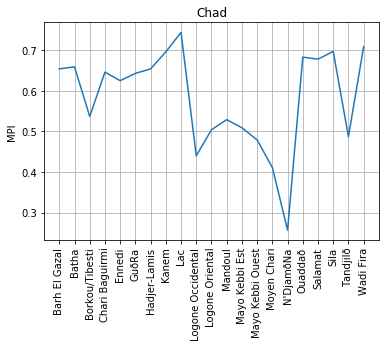

In [78]:
countries = final_df['Country'].unique().tolist()
len(countries)
codes = final_df['ISO'].unique().tolist()
len(codes)
graph_country = 'Chad'
mask = final_df['Country'].str.contains(graph_country)
stage = final_df[mask]
# print(stage)
# plt.xlabel(final_df['Sub-national region'])
# stage.plot(y=11)
regions = stage['Sub-national region'].values
indexof = stage['MPI Regional'].values

plt.plot(regions, indexof)
plt.title(graph_country)
plt.ylabel('MPI')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()
# it will be interesting to show how the MPI changes in relation to the
# urban centers